We use several classification algorithms to find the features that are important for classifying data points in each cluster. By looking at the distribution of the important features, we find a cluster for each data set that behaves suspiciously. We use the following classifiers:

- Random Forest
- Extra Trees
- XGBoost
- Decision Tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from matplotlib.offsetbox import AnchoredText
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ks_2samp
from xgboost import XGBClassifier
from xgboost import plot_importance

sns.set(style="whitegrid")

In [4]:
datasets = ['all_metrics',
            'all_no_outliers',
            'absolute',
            'absolute_no_outliers',
            'relative' ,
            'relative_no_outliers',
           'no_corr_metrics',
           'no_corr_metrics_no_outliers']

classifiers = {'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
               'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=100),
               'XGBClassifier': XGBClassifier(),
               'Decision Tree': DecisionTreeClassifier()
              }

test = pd.read_csv('results/metrics_prior.csv')
to_drop = ['apls_count', 'niu_count', 'npl_count', 'npnn_count', 
           'npnn_count_relative', 'npun_count', 'npun_count_relative', 
           'npvr_count', 'nrgv_count', 'nrl_count', 'nrvr_count', 
           'nvr_count', 'nscm_count', 'nmo_count', 'nimpp_count', 'file']

X_test = test.drop(columns=to_drop)
X_test = test.dropna()
y_test = test['y']
X_test = test.drop(columns=['y'])

features = {}
for name, clf in classifiers.items():
    print("Extracting features using ", name)
    features[name] = {}
    for df in datasets:
        data = pd.read_csv('results/{}_clusters.csv'.format(df))
        data = data.drop(columns=['Unnamed: 0'])
        data['clusters'] = data['clusters'].astype('category')
        features[name][df] = {}
        features[name]["{}_scaled".format(df)] = {}
        
        print("Looking at ", df)
        X = np.array(data[data.columns[:-1]])
        y = np.array(data['clusters'])
        
        for scaled in [False, True]:
            if scaled:
                scaler = MinMaxScaler()
                X = scaler.fit_transform(X)
                data[data.columns[:-1]] = X
                print("Working with scaled data.")
                features["{}_scaled".format(df)] = {}
            
            
            clf.fit(X,y)
            feature_importances = sorted(zip(data.columns[:-1],clf.feature_importances_),
                                reverse=True, key=lambda x: x[1])

#             elif name == 'Eigenvalues':
#                 cov_mat = np.cov([X[i,:] for i in range(len(X[0]))])
#                 eig_val, eig_vec = np.linalg.eig(cov_mat)
#                 feature_importances = [(data.columns[i], np.abs(eig_val[i])) for i in range(len(eig_val))]
#                 feature_importances = sorted(feature_importances, reverse=True, key=lambda x: x[1])
                
                
            #print('Most important features for {}:'.format(df), *feature_importances[:5], sep='\n')
            
            if scaled:
                features[name]["{}_scaled".format(df)] = feature_importances[:10]
            else:
                features[name][df] = feature_importances[:10]

Extracting features using  RandomForestClassifier
Looking at  all_metrics
Working with scaled data.
Looking at  all_no_outliers
Working with scaled data.
Looking at  absolute
Working with scaled data.
Looking at  absolute_no_outliers
Working with scaled data.
Looking at  relative
Working with scaled data.
Looking at  relative_no_outliers
Working with scaled data.
Looking at  no_corr_metrics
Working with scaled data.
Looking at  no_corr_metrics_no_outliers
Working with scaled data.
Extracting features using  ExtraTreesClassifier
Looking at  all_metrics
Working with scaled data.
Looking at  all_no_outliers
Working with scaled data.
Looking at  absolute
Working with scaled data.
Looking at  absolute_no_outliers
Working with scaled data.
Looking at  relative
Working with scaled data.
Looking at  relative_no_outliers
Working with scaled data.
Looking at  no_corr_metrics
Working with scaled data.
Looking at  no_corr_metrics_no_outliers
Working with scaled data.
Extracting features using  XGB

In [5]:
reform = {(outerKey, innerKey): values for outerKey, innerDict in features.items() for innerKey, values in innerDict.items()}
result_df = pd.DataFrame(reform)

In [6]:
cum_importances = {}
for col in result_df.columns:
    if not col[1] in cum_importances.keys():
        cum_importances[col[1]] = {}
        
    for idx, (metric, importance) in enumerate(result_df[col]):
        if metric in cum_importances[col[1]].keys():
            cum_importances[col[1]][metric] += 10-idx
        else:
            cum_importances[col[1]][metric] = 10-idx        

In [7]:
import operator
sorted_importances = {df: sorted(cum_importances[df].items(), key=operator.itemgetter(1), reverse=True) for df in cum_importances.keys()}

In [8]:
sorted_importances

{'all_metrics': [('ntkn_count', 40),
  ('loc_count', 34),
  ('nkeys_count', 34),
  ('ncd_count', 20),
  ('nnnv_count', 18),
  ('nts_count', 14),
  ('ntun_count', 12),
  ('etp_count', 9),
  ('nun_count', 8),
  ('nmd_count', 7),
  ('nemd_count_relative', 7),
  ('bloc_count_relative', 6),
  ('atss_count', 4),
  ('nco_count', 3),
  ('nfl_count', 2),
  ('ntvr_count', 1),
  ('nbl_count', 1)],
 'all_metrics_scaled': [('ntkn_count', 40),
  ('loc_count', 35),
  ('nkeys_count', 33),
  ('ncd_count', 20),
  ('nts_count', 16),
  ('etp_count', 14),
  ('nnnv_count', 12),
  ('ntun_count', 12),
  ('nemd_count_relative', 10),
  ('nun_count', 8),
  ('bloc_count_relative', 6),
  ('nmd_count', 5),
  ('ninct_count', 4),
  ('nfl_count', 2),
  ('ntvr_count', 1),
  ('nbl_count', 1),
  ('nco_count', 1)],
 'all_no_outliers': [('ntkn_count', 40),
  ('loc_count', 36),
  ('nkeys_count', 32),
  ('etp_count', 19),
  ('ncd_count', 18),
  ('ntun_count', 17),
  ('nnnv_count', 11),
  ('nun_count', 9),
  ('atss_count', 8)

In [9]:
sorted_importances['all_metrics']

[('ntkn_count', 40),
 ('loc_count', 34),
 ('nkeys_count', 34),
 ('ncd_count', 20),
 ('nnnv_count', 18),
 ('nts_count', 14),
 ('ntun_count', 12),
 ('etp_count', 9),
 ('nun_count', 8),
 ('nmd_count', 7),
 ('nemd_count_relative', 7),
 ('bloc_count_relative', 6),
 ('atss_count', 4),
 ('nco_count', 3),
 ('nfl_count', 2),
 ('ntvr_count', 1),
 ('nbl_count', 1)]

all metrics


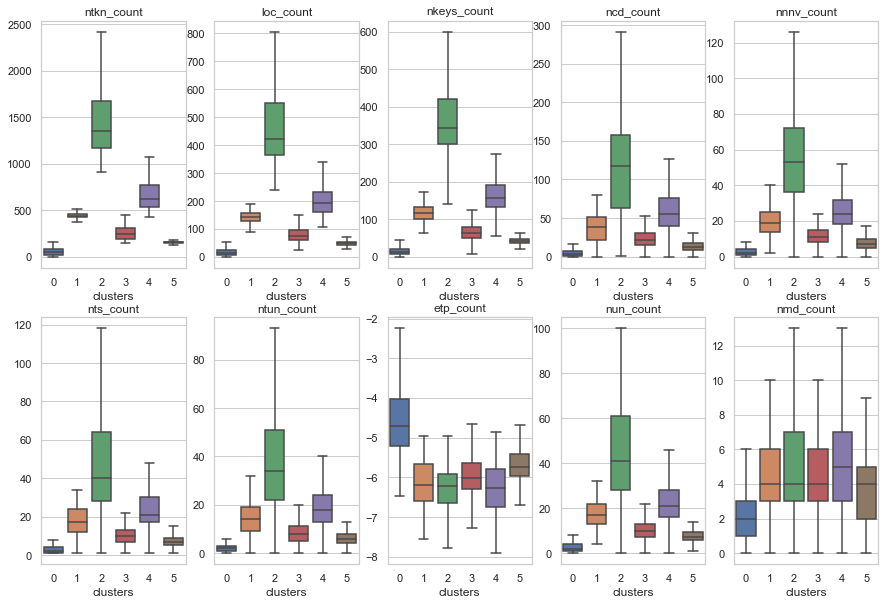

all no outliers


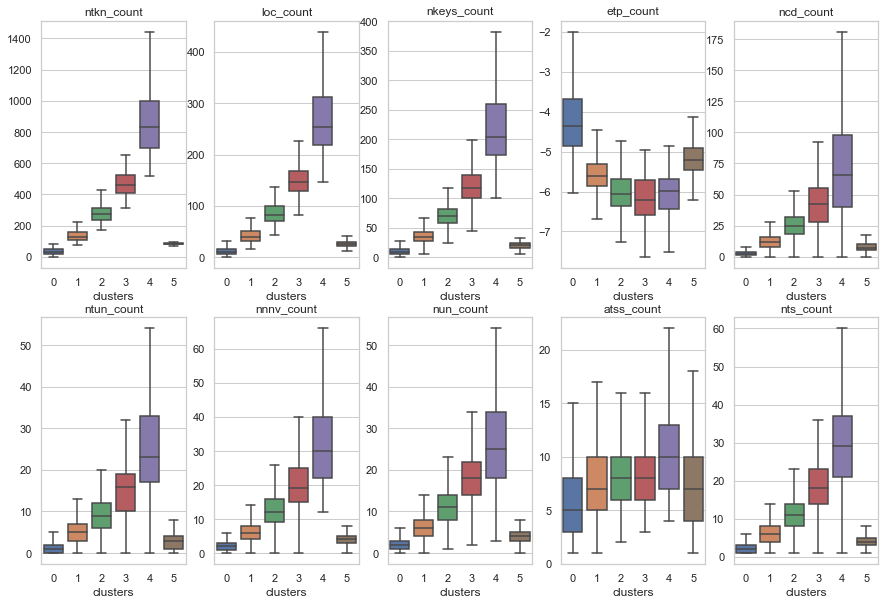

absolute


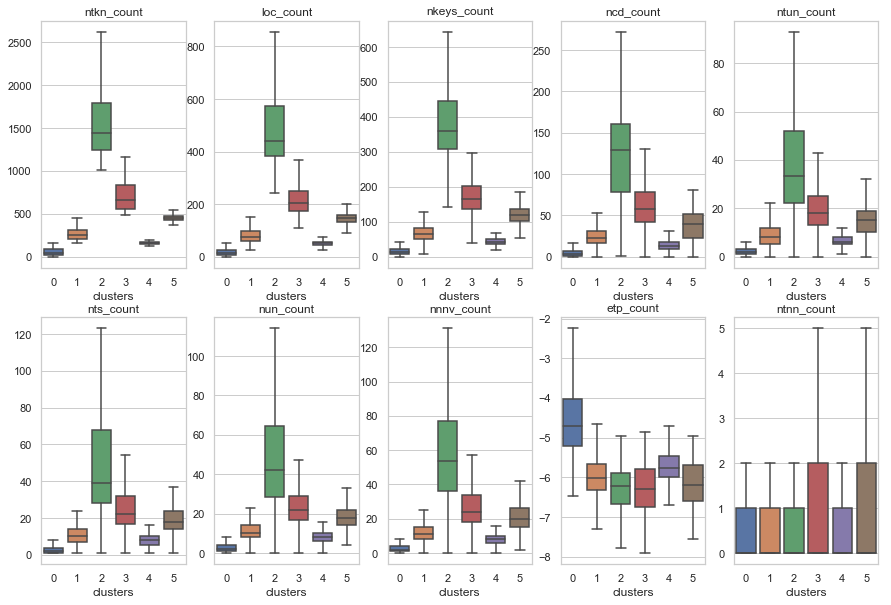

absolute no outliers


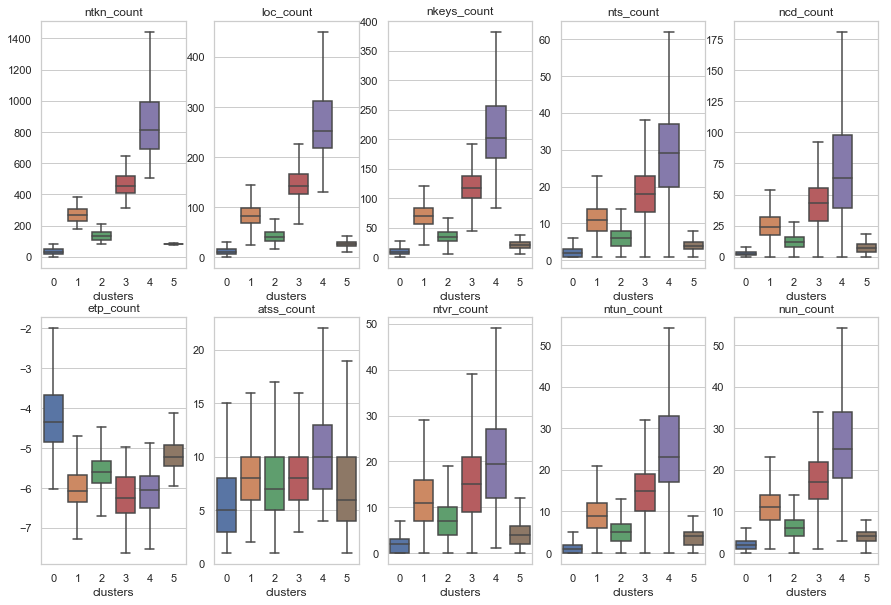

relative


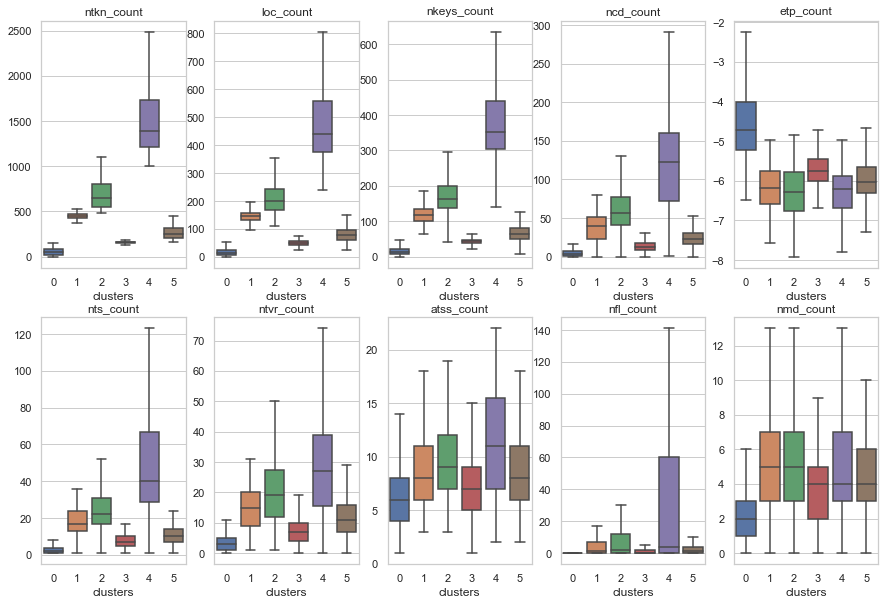

relative no outliers


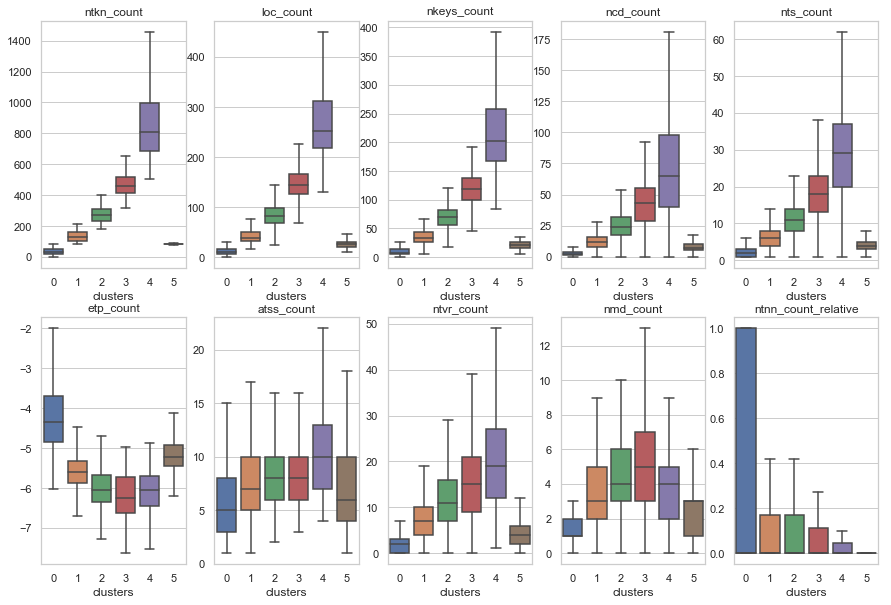

no corr metrics


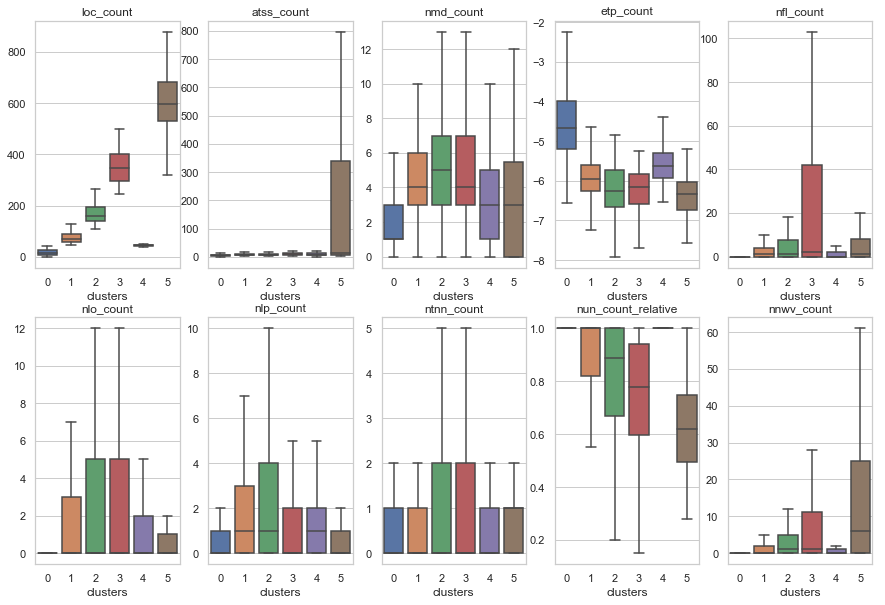

no corr metrics no outliers


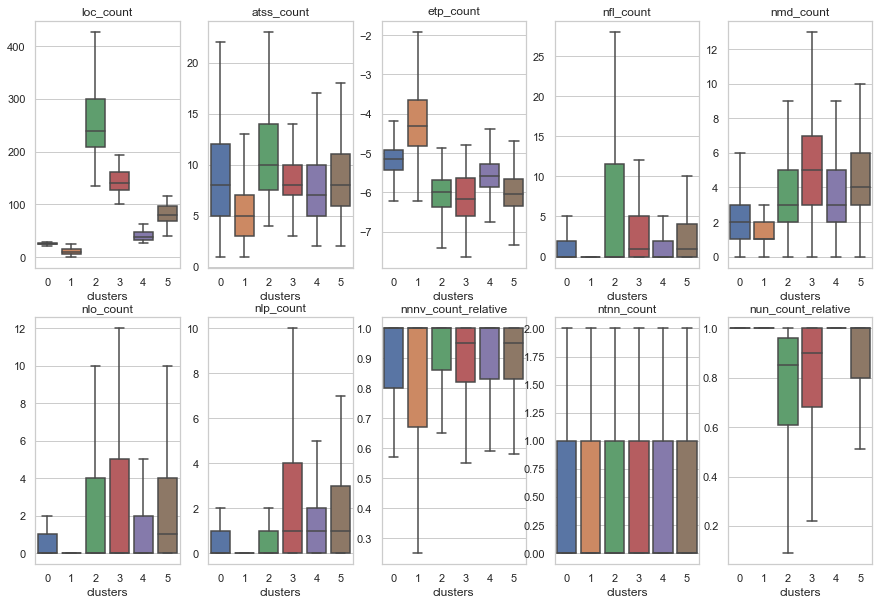

In [10]:
datasets = ['all_metrics',
            'all_no_outliers',
            'absolute',
            'absolute_no_outliers',
            'relative' ,
            'relative_no_outliers',
           'no_corr_metrics',
           'no_corr_metrics_no_outliers']

for df in datasets:
    data = pd.read_csv('results/{}_clusters.csv'.format(df))
    data = data.drop(columns=['Unnamed: 0'])
    data['clusters'] = data['clusters'].astype('category')
    
    fig, ax = plt.subplots(2,5, figsize=(15,10))
    print(df.replace("_", " "))
    # print(Counter(data['clusters']))
    important_metrics = [x[0] for x in sorted_importances[df][:10]]
    for ax, col in zip(ax.flat, important_metrics):
        if col in data.columns:
            sns.boxplot(x="clusters", y=col, data=data, showfliers=False, ax=ax)
            ax.title.set_text(col)
            y_axis = ax.axes.get_yaxis()
            y_label = y_axis.get_label()
            y_label.set_visible(False)
    plt.savefig('figures/feature_boxplot_{}.png'.format(df), dpi=300, bbox_inches='tight')

    plt.show()

Note that it depends on the results and the seed of the current and previous notebooks how these clusters turn out, and what cluster turns out to be the suspicious cluster. However, one should notice that for each data set, there is one cluster that sticks out.

Next, we try to find similarities between the suspicious clusters by looking at Playbooks present in several suspicious clusters.

In [22]:
datasets = [('all_metrics', 2),
            ('all_no_outliers', 4),
            ('absolute', 2),
            ('absolute_no_outliers', 4),
            ('relative' , 4),
            ('relative_no_outliers', 4),
           ('no_corr_metrics', 5),
           ('no_corr_metrics_no_outliers', 2)]

resulting_dfs = []
with_filename = pd.read_csv('results/results_with_outliers.csv')

for df, suspicious_cluster in datasets:
    data = pd.read_csv('results/{}_clusters.csv'.format(df))
    data = data.drop(columns=['Unnamed: 0'])
    data['clusters'] = data['clusters'].astype('category')
    suspicious = data[data['clusters']==suspicious_cluster]
    
    res = suspicious.merge(with_filename, on=list(suspicious.columns[:-1]))
    res = res.drop_duplicates()
    resulting_dfs.append(res)
    
    

In [23]:
intersects = {}
for i in range(len(resulting_dfs)):
    name_i = datasets[i][0]
    intersects[name_i] = {}
    for j in range(i, len(resulting_dfs)):
        name_j = datasets[j][0]
        columns = [col for col in resulting_dfs[i].columns if col in resulting_dfs[j].columns]
        intersect = [f for f in resulting_dfs[i]['file'] if f in resulting_dfs[j]['file'].values]
        intersects[name_i][name_j] = len(intersect)

In [20]:
print(pd.DataFrame.from_dict(intersects).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  all\_metrics &  all\_no\_outliers &  absolute &  absolute\_no\_outliers &  relative &  relative\_no\_outliers &  no\_corr\_metrics &  no\_corr\_metrics\_no\_outliers \\
\midrule
all\_metrics                 &          169 &              NaN &       NaN &                   NaN &       NaN &                   NaN &              NaN &                          NaN \\
all\_no\_outliers             &           51 &            200.0 &       NaN &                   NaN &       NaN &                   NaN &              NaN &                          NaN \\
absolute                    &          146 &             39.0 &     146.0 &                   NaN &       NaN &                   NaN &              NaN &                          NaN \\
absolute\_no\_outliers        &           51 &            199.0 &      39.0 &                 206.0 &       NaN &                   NaN &              NaN &                          NaN \\
relative                   

In [24]:
pd.DataFrame.from_dict(intersects)

,all_metrics,all_no_outliers,absolute,absolute_no_outliers,relative,relative_no_outliers,no_corr_metrics,no_corr_metrics_no_outliers
all_metrics,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all_no_outliers,51,200.0,NaN,NaN,NaN,NaN,NaN,NaN
absolute,146,39.0,146.0,NaN,NaN,NaN,NaN,NaN
absolute_no_outliers,51,199.0,39.0,206.0,NaN,NaN,NaN,NaN
relative,155,42.0,146.0,42.0,155.0,NaN,NaN,NaN
relative_no_outliers,51,199.0,39.0,205.0,42.0,207.0,NaN,NaN
no_corr_metrics,62,6.0,62.0,6.0,62.0,6.0,67.0,NaN
no_corr_metrics_no_outliers,51,185.0,39.0,188.0,42.0,188.0,6.0,239.0


We find that the biggest similarities are found between the data sets that contain outliers, as well as between the data sets that do not contain outliers.